Image Automation Version 1:
Detects face of construction worker and based on face dimensions, resizes hard hat image.
Then randomizes location of the placement of hard hat on image and produces 10 new images
to augment to the image dataset.
To do's:
1. Write method to ensure that hat is not placed on face
2. Train model using augmented dataset

In [1]:
#importing necessary packages
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from pylab import *
import random

In [2]:
#Load and treat image
imagePath = "testHat1.jpg"

#Create cascade and initialize with face cascade
cascadePath = "haarcascade_frontalface_default.xml"
faceCascade = cv2.CascadeClassifier(cascadePath)

#Read/Load the image
image = cv2.imread(imagePath)
#convert to grayscale
grayScale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [3]:
#Detect faces in image
faces = faceCascade.detectMultiScale(
    grayScale, 
    scaleFactor = 1.1, 
    minNeighbors = 5,
    minSize = (30,30),
    flags = cv2.CASCADE_SCALE_IMAGE
)


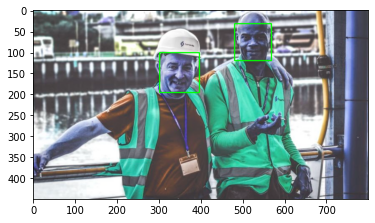

In [4]:
#Draw a rectangle around the faces using rectangle() function
for(x, y, w, h) in faces:
    temp = cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)
#display image
plt.imshow(image, cmap='jet')

In [5]:
faces
len(faces)

2

62
52
97
81


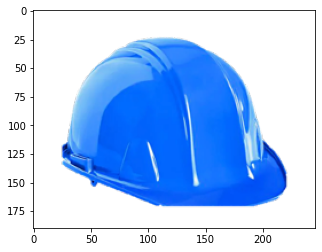

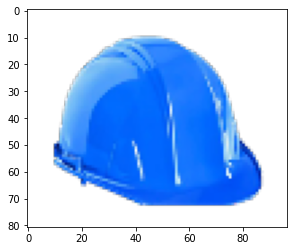

True

In [6]:
#average the width and height of all the faces
avgWidth = 0
avgHeight = 0
#if len(faces) == 0
  #  helmetWidth = 124
   # helmetHeight = 104
#else
for(x, y, w, h) in faces:
    avgWidth += w
    avgHeight += h
    avgWidth = int(avgWidth/len(faces))
    avgHeight = int(avgHeight/len(faces))
    helmetWidth = int((124*avgWidth)/88)
    helmetHeight = int((104*avgHeight)/88)
    print(helmetWidth)
    print(helmetHeight)

hatPath = "orangeHat.png"

helmetImage = cv2.imread(hatPath, cv2.IMREAD_UNCHANGED)
imshow(helmetImage)
show()

new_helmet = cv2.resize(helmetImage, (helmetWidth, helmetHeight))
imshow(new_helmet)
show()
cv2.imwrite("hat.png", new_helmet)

1


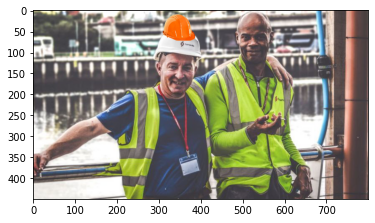

2


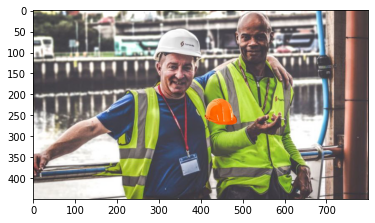

3


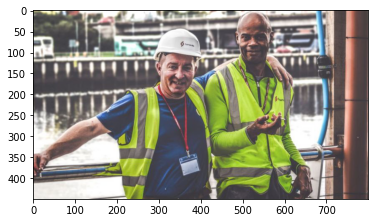

4


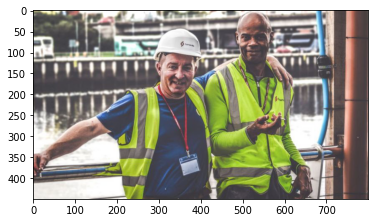

5


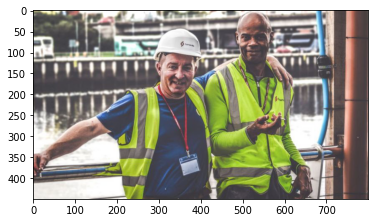

6


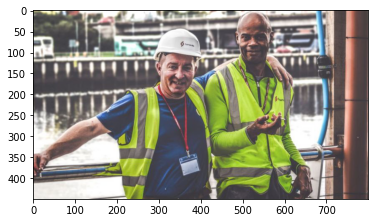

7


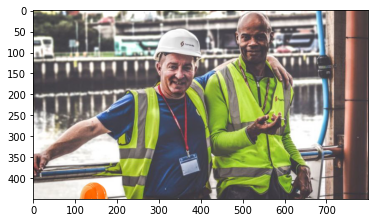

8


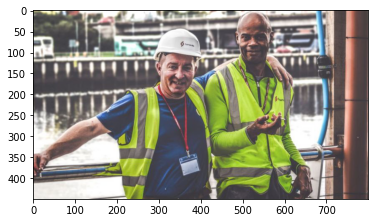

9


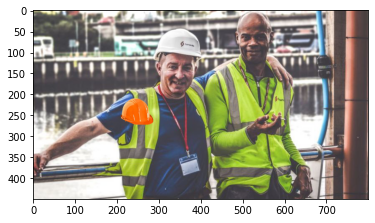

In [7]:
#imports random module
import random

hat = Image.open("hat.png")
backgroundImage = Image.open(imagePath)

#initialize location variables
locationX = 0
locationY = 0

#name of image that will be saved
imgName = "image1_"

#for loop with randomizer -> run 15 times
for x in range(1,10):
    print(x)
    #reset background image
    tempBack = Image.open(imagePath) 
    for i in range(0,len(faces)):   
        locationX = (random.randint(0,6))*100
        locationY = (random.randint(0,5))*100
    tempBack.paste(hat, (locationX,locationY), hat)
    tempImgName = imgName + str(x) + ".jpg"
    #save image to folder
    #tempBack.save(tempImgName, "JPEG")
    imshow(tempBack)
    show()